<a href="https://colab.research.google.com/github/EricSantosOliveira/Challenge---DIO-ranking/blob/main/Desafio_DIO_1%C2%BA_Analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd # Importando a biblioteca do pandas

from google.colab import files
upload=files.upload()

Saving dados_vendas.xlsx to dados_vendas.xlsx


In [ ]:
df = pd.read_excel("dados_vendas.xlsx") # Leitura do arquivo excel

df.head()

,ID Venda,Data Venda,Produto,Categoria,Quantidade,Preço Unitário (R$),Total Venda (R$)
0,1,2024-02-04,Mesa de Escritório,Móveis,2,1125.42,2250.84
1,2,2024-02-14,Webcam,Periféricos,2,2103.84,4207.68
2,3,2024-02-12,Impressora,Periféricos,7,1284.06,8988.42
3,4,2024-01-20,Webcam,Periféricos,2,4715.85,9431.70
4,5,2024-02-04,Teclado,Acessórios,7,4714.61,33002.27


In [ ]:
df.shape # Total de linhas e colunas

(500, 7)

In [ ]:
df.dtypes # Tipo dos dados

,0
ID Venda,int64
Data Venda,object
Produto,object
Categoria,object
Quantidade,int64
Preço Unitário (R$),float64
Total Venda (R$),float64


In [ ]:
df["Total Venda (R$)"].sum() # Soma total da coluna Total Venda (R$).

7054167.05

In [ ]:
from google.colab import drive # Conectando meu acesso ao google drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
caminho_arquivo = "/content/drive/My Drive/Colab Notebooks/dados_vendas_final.xlsx" # Localizando a pasta do google drive onde iremos salvar minhas analises.
df.to_excel(caminho_arquivo, index=False)
print("Arquivo salvo no Google Drive!")


Arquivo salvo no Google Drive!


In [ ]:
df["Data Venda"] = pd.to_datetime(df["Data Venda"]) # convertendo a coluna "Data Venda" para o tipo data.


In [ ]:
df.dtypes

,0
ID Venda,int64
Data Venda,datetime64[ns]
Produto,object
Categoria,object
Quantidade,int64
Preço Unitário (R$),float64
Total Venda (R$),float64


In [ ]:
df.groupby(df["Data Venda"].dt.year)["Total Venda (R$)"].sum() # Agrupando o valor total das vendas por ano

,Total Venda (R$)
Data Venda,
2024,7054167.05


In [ ]:
df["Ano"]=df["Data Venda"].dt.year # Criando uma nova coluna para o ano exclusivamente

df.head()

,ID Venda,Data Venda,Produto,Categoria,Quantidade,Preço Unitário (R$),Total Venda (R$),Ano
0,1,2024-02-04,Mesa de Escritório,Móveis,2,1125.42,2250.84,2024
1,2,2024-02-14,Webcam,Periféricos,2,2103.84,4207.68,2024
2,3,2024-02-12,Impressora,Periféricos,7,1284.06,8988.42,2024
3,4,2024-01-20,Webcam,Periféricos,2,4715.85,9431.70,2024
4,5,2024-02-04,Teclado,Acessórios,7,4714.61,33002.27,2024


In [ ]:
df["Dia"] = df["Data Venda"].dt.day # Criando duas novas colunas para o dia da venda e seu mês
df["Mês"] = df["Data Venda"].dt.month
df.head ()

,ID Venda,Data Venda,Produto,Categoria,Quantidade,Preço Unitário (R$),Total Venda (R$),Ano,Dia,Mês
0,1,2024-02-04,Mesa de Escritório,Móveis,2,1125.42,2250.84,2024,4,2
1,2,2024-02-14,Webcam,Periféricos,2,2103.84,4207.68,2024,14,2
2,3,2024-02-12,Impressora,Periféricos,7,1284.06,8988.42,2024,12,2
3,4,2024-01-20,Webcam,Periféricos,2,4715.85,9431.70,2024,20,1
4,5,2024-02-04,Teclado,Acessórios,7,4714.61,33002.27,2024,4,2


In [ ]:
# Verificando a data mais antiga da venda
df["Data Venda"].min()

Timestamp('2024-01-01 00:00:00')

In [ ]:
# Verificando a data mais recente da venda
df["Data Venda"].max()

Timestamp('2024-03-31 00:00:00')

In [ ]:
# Filtrando as vendas do mês de março

vendas_marco2024 = df.loc[(df["Data Venda"].dt.year ==2024) & (df["Data Venda"].dt.month == 3)]

vendas_marco2024

,ID Venda,Data Venda,Produto,Categoria,Quantidade,Preço Unitário (R$),Total Venda (R$),Ano,Dia,Mês
19,20,2024-03-19,Tablet,Eletrônicos,7,691.67,4841.69,2024,19,3
21,22,2024-03-14,Teclado,Acessórios,7,2761.66,19331.62,2024,14,3
28,29,2024-03-12,Monitor,Periféricos,5,1546.82,7734.10,2024,12,3
29,30,2024-03-26,Monitor,Periféricos,10,2374.79,23747.90,2024,26,3
35,36,2024-03-30,Impressora,Periféricos,6,4929.28,29575.68,2024,30,3
...,...,...,...,...,...,...,...,...,...,...
480,481,2024-03-29,Teclado,Acessórios,6,3852.49,23114.94,2024,29,3
489,490,2024-03-12,Teclado,Acessórios,5,3147.02,15735.10,2024,12,3
490,491,2024-03-05,Impressora,Periféricos,7,576.63,4036.41,2024,5,3
494,495,2024-03-27,Teclado,Acessórios,5,1829.74,9148.70,2024,27,3


In [ ]:
df["Categoria"].value_counts(ascending=False) # Contando a quantidade de linhas com base na coluna "Categoria"


,count
Categoria,
Periféricos,145
Eletrônicos,126
Móveis,117
Acessórios,112


In [ ]:
 import pandas as pd # Importando a biblioteca do pandas

from google.colab import files
upload=files.upload()

Saving dados_vendas.xlsx to dados_vendas.xlsx


In [ ]:
df["Data Venda"] = pd.to_datetime(df["Data Venda"]) # convertendo a coluna "Data Venda" para o tipo data.

In [ ]:
df = pd.read_excel("dados_vendas.xlsx") # Leitura do arquivo excel

df.head()

,ID Venda,Data Venda,Produto,Categoria,Quantidade,Preço Unitário (R$),Total Venda (R$)
0,1,2024-02-04,Mesa de Escritório,Móveis,2,1125.42,2250.84
1,2,2024-02-14,Webcam,Periféricos,2,2103.84,4207.68
2,3,2024-02-12,Impressora,Periféricos,7,1284.06,8988.42
3,4,2024-01-20,Webcam,Periféricos,2,4715.85,9431.70
4,5,2024-02-04,Teclado,Acessórios,7,4714.61,33002.27


In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='Categoria'>

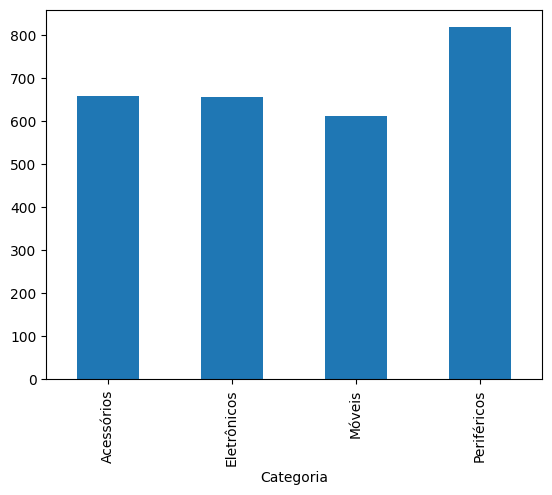

In [ ]:
df.groupby(df["Categoria"])["Quantidade"].sum().plot.bar() # Gráfico do total vendas por categoria


<Axes: title={'center': 'Total de vendas por Categoria'}, xlabel='Categoria'>

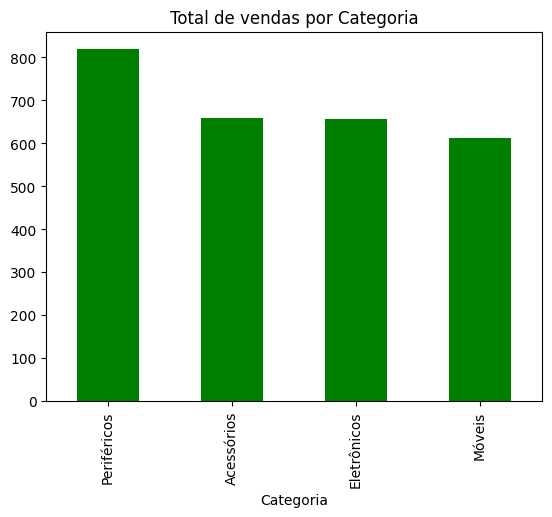

In [ ]:
df.groupby(df["Categoria"])["Quantidade"].sum().sort_values(ascending=False).plot.bar(title="Total de vendas por Categoria", color="green") # Adicionando um título, cor e ordenando em modo decrescente

In [ ]:
caminho_arquivo = "/content/drive/My Drive/Colab Notebooks/dados_vendas_final.xlsx" # Localizando a pasta do google drive onde iremos salvar minhas analises.
df.to_excel(caminho_arquivo, index=False)
print("Arquivo salvo no Google Drive!")

Arquivo salvo no Google Drive!


<Axes: title={'center': 'Total de vendas por Categoria'}, xlabel='Categoria'>

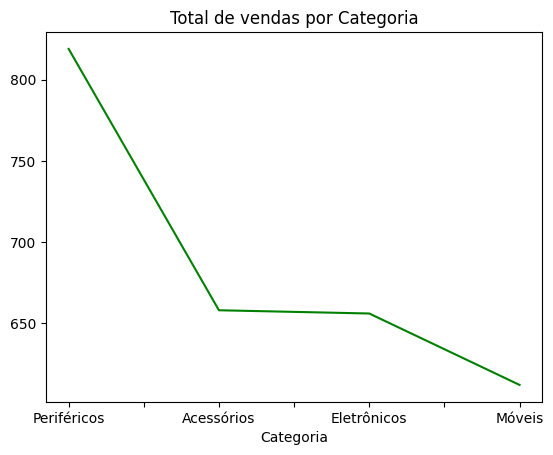

In [ ]:
df.groupby(df["Categoria"])["Quantidade"].sum().sort_values(ascending=False).plot(title="Total de vendas por Categoria", color="green") # Mudando o gráfico para o tipo de linhas

<Axes: title={'center': 'Total de vendas por Categoria'}, xlabel='Categoria'>

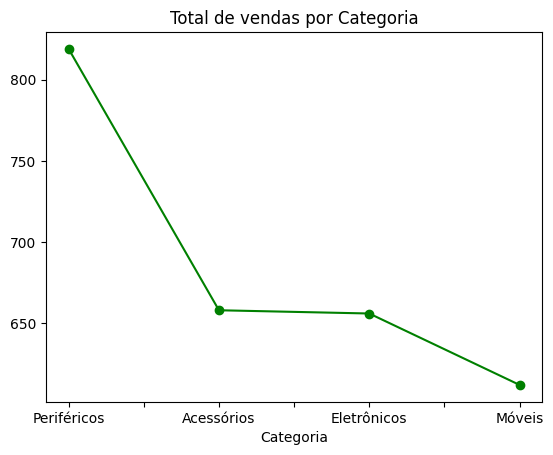

In [ ]:
df.groupby(df["Categoria"])["Quantidade"].sum().sort_values(ascending=False).plot(title="Total de vendas por Categoria", color="green", marker = "o") # Adicionando marcadores

In [ ]:
caminho_arquivo = "/content/drive/My Drive/Colab Notebooks/dados_vendas_final.xlsx" # Localizando a pasta do google drive onde iremos salvar minhas analises.
df.to_excel(caminho_arquivo, index=False)
print("Arquivo salvo no Google Drive!")

Arquivo salvo no Google Drive!
